In [1]:
import basc

import astropy
from astropy.table import Table
from astropy.io import fits

# silent Warning, when open image using aplpy
import warnings
from astropy.utils.exceptions import AstropyWarning 
warnings.simplefilter('ignore', category=AstropyWarning)

import matplotlib
import matplotlib.pyplot as plt

import aplpy

basc.readConfig("config.txt")

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# Generate a view objecct to work with
newView = basc.view()

In [3]:
# I think this object is, NGC 1808 or PKS J0507-3730
image_file = 'ex_image.fits'
psf_file   = 'ex_psf.fits'
flux_file  = 'ex_flux.fits'

In [4]:
# Load in the fits files
newView.loadMap(image_file)
newView.loadBeam(psf_file)
newView.loadPBCor(flux_file)

In [5]:
# Run the MCMC process
newView.run()
result = newView.getChain()

In [6]:
print("Evidence: {}".format(newView.getEvidence()))
print("RMS residual: {}".format(newView.getRMS()))

result.write("chain.txt", format="ascii", overwrite=True)
print("Models written to chain.txt")

print("Sources detected:")
print(newView.clusters(eps=3)[0])

Evidence: 1151.6546301070634
RMS residual: 2.6324954854696068e-05
Models written to chain.txt
Sources detected:
        x                  y          ...           F          
------------------ ------------------ ... ---------------------
255.86018705909902 255.01179215041074 ... 0.0053607454512118674


In [7]:
fits.info(image_file)

Filename: ex_image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     106   (1024, 1024, 1, 1)   float32   


In [8]:
image_data = fits.getdata(image_file)
psf_data = fits.getdata(psf_file)
flux_data = fits.getdata(flux_file)

In [9]:
image_data.shape

(1, 1, 1024, 1024)

In [10]:
image_data[0][0].shape

(1024, 1024)

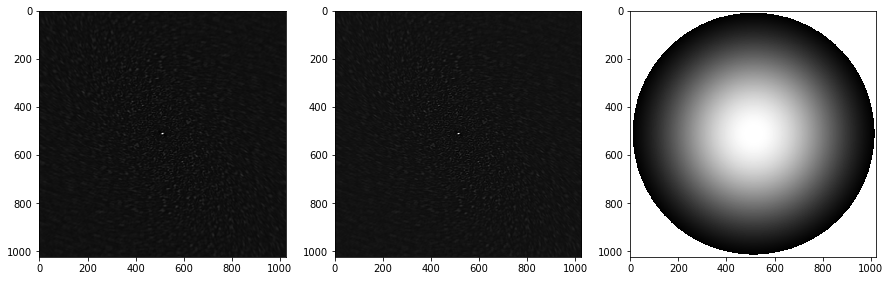

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image_data[0][0], cmap='gray')

plt.subplot(132)
plt.imshow(psf_data[0][0], cmap='gray')

plt.subplot(133)
plt.imshow(flux_data[0][0], cmap='gray')

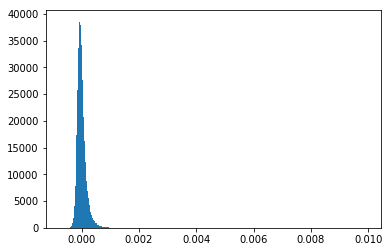

In [12]:
histogram = plt.hist(image_data[0][0].flatten(), 1000)

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -4.371e-04 [aplpy.core]
INFO: Auto-setting vmax to  9.425e-04 [aplpy.core]


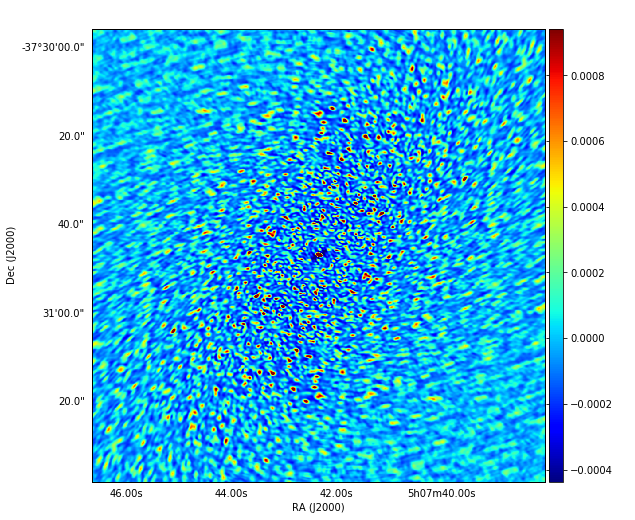

In [13]:
image = aplpy.FITSFigure(image_file)
image.show_colorscale()
image.show_colorbar()
#image.show_contour()

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -4.545e-02 [aplpy.core]
INFO: Auto-setting vmax to  9.213e-02 [aplpy.core]


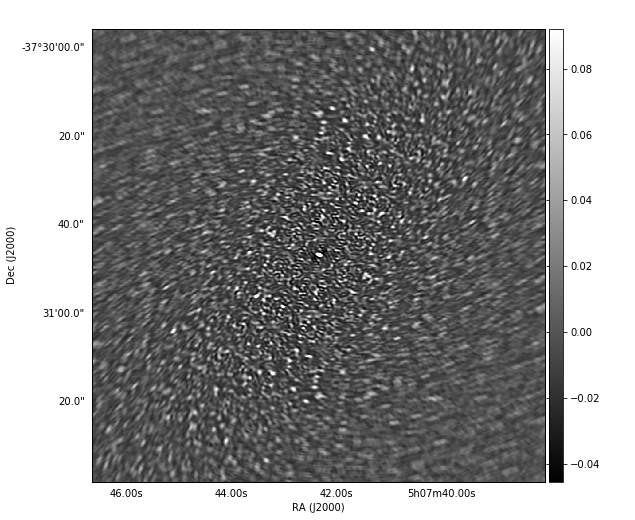

In [14]:
psf = aplpy.FITSFigure(psf_file)
psf.show_grayscale()
psf.show_colorbar()
#psf.show_contour()

In [15]:
newView.clusters()

(<Table length=2>
         x                  y          ...          F          
      float64            float64       ...       float64       
 ------------------ ------------------ ... --------------------
 255.17754314704374 253.47108263861048 ... 0.001270499330177535
  256.5428309711543   256.552501662211 ... 0.009450991572246199, 5)

In [16]:
result

x,y,F,k,L
float64,float64,float64,int64,float64
255.8759177327156,253.61287146806717,0.0009962835679118232,0,1842.2825754740356
256.98716002702713,256.92652744054794,0.009729201991199943,0,1842.2825754740356
186.42704528570175,190.11997240781784,1.0940327652300864e-05,1,1842.9384668209264
254.93027168512344,253.77547055482864,0.001062389881655584,1,1842.9384668209264
256.07472544908524,256.94055730104446,0.009738367602203616,1,1842.9384668209264
256.85474067926407,256.6156306862831,0.009439669763680325,2,1843.964169929059
407.6858968138695,347.17096585035324,3.808480358606743e-06,2,1843.964169929059
255.44785171747208,253.8629841208458,0.001423487134554168,2,1843.964169929059
256.6728464961052,256.1577168107033,0.00976258873953006,3,1842.0948383723594


In [17]:
newView.getRMS()

2.6324954854696068e-05

In [18]:
newView.getEvidence()

1151.6546301070634

In [19]:
newView.resid

array([[ 2.08280881e-05,  1.53967530e-05,  1.20445773e-05, ...,
         2.93846365e-05,  2.97926779e-05,  2.72914972e-05],
       [ 2.21748461e-05,  1.83146915e-05,  1.56415115e-05, ...,
         2.66985549e-05,  2.72207368e-05,  2.52156667e-05],
       [ 1.97632635e-05,  1.79774724e-05,  1.68396408e-05, ...,
         2.03955888e-05,  2.07445289e-05,  1.93054454e-05],
       ...,
       [-1.68952195e-05, -1.50090413e-05, -1.24412418e-05, ...,
         1.27824293e-05,  1.52663496e-05,  1.75409174e-05],
       [-1.29969235e-05, -1.04348552e-05, -7.48147311e-06, ...,
         8.10643348e-06,  1.07155888e-05,  1.43489479e-05],
       [-7.57603656e-06, -4.74971375e-06, -1.92382461e-06, ...,
         4.10235449e-06,  5.13926697e-06,  8.31593483e-06]])

In [20]:
newView.resid.shape

(512, 512)